# <center> Neural Network with Pytorch 
<center> Institution: Centro de Investigación en Matemáticas A.C. 
<center> Ing. Gabriel Alejandro Aguilar Farrera  
<center> Course: Deep Learning 

# Problema 5

### Step 1: Import Libraries

In [174]:
# Delete all variables  pre defined
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
# Torch libraries
import torch
from torch.utils.data import Dataset, DataLoader # Handling and loading custom datasets 
                                                 # during the training of neural networks
    
from torchvision import datasets, transforms     # Provides examples of datasets

import torch.nn.functional as F                  # Provides a collection of functions that are 
                                                 # often used in deep learning models, loss functions, etc.

from torch.autograd import Variable
import torch.nn as nn                            # Build and train Neural Network
from torchsummary import summary                 # Visualice a model's summary

# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Time librarie
import time

# Visualitation libraries
%config InlineBackend.figure_format = 'retina'   # Improve image quality

In [176]:
# Librarie´s version
print(np.__version__)
print(torch.__version__)

1.21.5
2.0.1+cpu


In [177]:
# ¿ CUDA is available ?
use_cuda = torch.cuda.is_available()
use_cuda

False

### Step 2: Import and transform the dataset

In [178]:
# Define a data transformation: Convert data to tensar and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize( mean = [0.1307], std = [0.3081]) ])
path      = 'MNIST_data'
# Download the train set and test set and apply the transformation
train     = datasets.MNIST(root = path, download = True, train = True, transform = transform)
test      = datasets.MNIST(root = path, download = True, train = False, transform = transform)

In [179]:
print('Test size: {}'.format( len(test) ))
print('Train size: {}'.format( len(train) ))
print('Total size: {}'.format( len(train) + len(test)  ))

Test size: 10000
Train size: 60000
Total size: 70000


### Step 3: DataLoader

In [180]:
batch_size    = 2000       # Define batch size
train_loader  = torch.utils.data.DataLoader(dataset    = train,
                                           batch_size  = batch_size,
                                           shuffle     = True)

test_loader   = torch.utils.data.DataLoader(dataset    = test,
                                           batch_size  = batch_size,
                                           shuffle     = True)

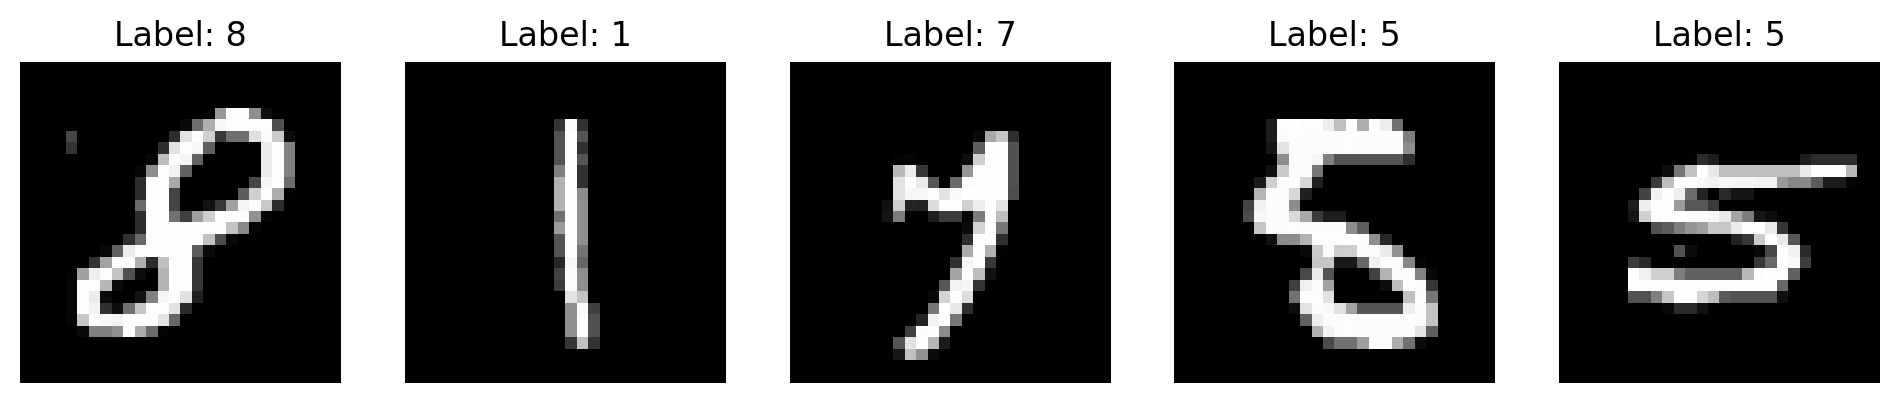

In [181]:
# Define a function to show images and labels
def show_images(images, labels):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

    for i in range(num_images):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis('off')
    plt.show()

# Get a random batch of data from the DataLoader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Randomly select 5 samples from the batch
random_indices = np.random.choice(len(images), size=5, replace=False)
selected_images = images[random_indices]
selected_labels = labels[random_indices]

# Show the selected images and their labels
show_images(selected_images, selected_labels)

### a)  Usando $\textbf{Pytorch}$, implementa un baseline basado en regresión logística (multiclase) para la clasificación de dígitos. Reporta su desempeño con las métricas que creas conveniente.

### Step 4: Create Neural Network Architecture

In [62]:
class RNA_1(nn.Module):
    # The constructor __init__(seklf, ...) define the parts that make up the model.
    def __init__(self, input_n, output_n):
        super(RNA_1, self).__init__() # Call methods and variables for super class
    
#----------------------------------------------------------------------------------------#        
        # ---INPUT LAYER--- (Linear function):             # 784 --> 10
        self.Linear_1 = nn.Linear(in_features = input_n,
                                 out_features = output_n)
#----------------------------------------------------------------------------------------#        

    # forward realice the actual computation, that is, it outputs a prediction, given the input x.
    def forward(self, x):
        x = x.view(-1, input_n)           # Flatten the image

        y_hat = self.Linear_1(x)
        return (y_hat)        # Return the final prediction
#----------------------------------------------------------------------------------------#

### Step 5: Create the model

In [63]:
input_n     = 784           # Number of pixels
output_n    = 10            # Number of labels

model = RNA_1(input_n = input_n,
            output_n = output_n)   # Instanciate the model
# print(model)          # Is the same that below
print(model.parameters)

<bound method Module.parameters of RNA_1(
  (Linear_1): Linear(in_features=784, out_features=10, bias=True)
)>


In [64]:
summary(model, (input_n,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


### b) Nuevamente, usando $\textbf{Pytorch}$, implementa redes neuronales con 1, 2 y 3 capas ocultas. ¿Qué mejoras obtienes en cada caso respecto al baseline? Reporta todos tus hallazgos y los parámetros que uses, incluyendo el número de unidades ocultas en la capa, el optimizador (uno solo para todos los modelos), el número de datos de entrenamiento, validación, tamaño del mini-batch, capas de regularización, etcétera.

## 1 Hidden layer

### Step 4: Create Neural Network Architecture

In [115]:
class RNA_1(nn.Module):
    # The constructor __init__(seklf, ...) define the parts that make up the model.
    def __init__(self, input_n, hidden_n, output_n):
        super(RNA_1, self).__init__() # Call methods and variables for super class
    
#----------------------------------------------------------------------------------------#        
        # ---INPUT LAYER--- (Linear function):             # 784 --> 100
        self.Linear_1 = nn.Linear(in_features = input_n,
                                 out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_1 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#        



#----------------------------------------------------------------------------------------#        
        # ---HIDDEN LAYER 1--- (Linear function):          # 100 --> 100
        self.Linear_2 = nn.Linear(in_features = hidden_n,
                                 out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_2 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#   


#----------------------------------------------------------------------------------------#                
        # ---Output layer---                               # 100 --> 10
        self.Linear_3 = nn.Linear(in_features = hidden_n,
                                  out_features = output_n) # 100 --> 10
#----------------------------------------------------------------------------------------# 


    # forward realice the actual computation, that is, it outputs a prediction, given the input x.
    def forward(self, x):
        x = x.view(-1, input_n)           # Flatten the image
#----------------------------------------------------------------------------------------#        
                              # --- INPUT LAYER ---#
        x = self.Linear_1(x)
        x = self.ReLU_1(x)
#----------------------------------------------------------------------------------------#        


#----------------------------------------------------------------------------------------#        
                              # --- HIDDEN LAYER 1 ---#
        x = self.Linear_2(x)
        x = self.ReLU_2(x)
#----------------------------------------------------------------------------------------#


#----------------------------------------------------------------------------------------#        
                              # --- OUTPUT LAYER ---#
        y_hat = self.Linear_3(x)
        return (y_hat)        # Return the final prediction
#----------------------------------------------------------------------------------------#

### Step 5: Create the model

In [116]:
input_n     = 784           # Number of pixels
hidden_n    = 150           # Number of neurons in hidden layers
output_n    = 10            # Number of labels

model = RNA_1(input_n = input_n,
            hidden_n = hidden_n,
            output_n = output_n)   # Instanciate the model
# print(model)          # Is the same that below
print(model.parameters)

<bound method Module.parameters of RNA_1(
  (Linear_1): Linear(in_features=784, out_features=150, bias=True)
  (ReLU_1): ReLU()
  (Linear_2): Linear(in_features=150, out_features=150, bias=True)
  (ReLU_2): ReLU()
  (Linear_3): Linear(in_features=150, out_features=10, bias=True)
)>


In [117]:
summary(model, (input_n,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 150]         117,750
              ReLU-2                  [-1, 150]               0
            Linear-3                  [-1, 150]          22,650
              ReLU-4                  [-1, 150]               0
            Linear-5                   [-1, 10]           1,510
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.54
Estimated Total Size (MB): 0.55
----------------------------------------------------------------


## 2 Hidden layer

### Step 4: Create Neural Network Architecture

In [182]:
class RNA_1(nn.Module):
    # The constructor __init__(self, ...) define the parts that make up the model.
    def __init__(self, input_n, hidden_n, output_n):
        super(RNA_1, self).__init__() # Call methods and variables for super class
    
#----------------------------------------------------------------------------------------#        
        # ---INPUT LAYER--- (Linear function):             # 784 --> 100
        self.Linear_1 = nn.Linear(in_features = input_n,
                                 out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_1 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#        



#----------------------------------------------------------------------------------------#        
        # ---HIDDEN LAYER 1--- (Linear function):          # 100 --> 100
        self.Linear_2 = nn.Linear(in_features = hidden_n,
                                 out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_2 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#   



#----------------------------------------------------------------------------------------#        
        # ---HIDDEN LAYER 2--- (Linear function):          # 100 --> 100
        self.Linear_3 = nn.Linear(in_features = hidden_n,
                                 out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_3 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#


#----------------------------------------------------------------------------------------#                
        # ---Output layer---                               # 100 --> 10
        self.Linear_4 = nn.Linear(in_features = hidden_n,
                                  out_features = output_n) # 100 --> 10
#----------------------------------------------------------------------------------------# 


    # forward realice the actual computation, that is, it outputs a prediction, given the input x.
    def forward(self, x):
        x = x.view(-1, input_n)           # Flatten the image
#----------------------------------------------------------------------------------------#        
                              # --- INPUT LAYER ---#
        x = self.Linear_1(x)
        x = self.ReLU_1(x)
#----------------------------------------------------------------------------------------#        

#----------------------------------------------------------------------------------------#        
                              # --- HIDDEN LAYER 1 ---#
        x = self.Linear_2(x)
        x = self.ReLU_2(x)
#----------------------------------------------------------------------------------------#


#----------------------------------------------------------------------------------------#        
                              # --- HIDDEN LAYER 2 ---#
        x = self.Linear_3(x)
        x = self.ReLU_3(x)
#----------------------------------------------------------------------------------------#


#----------------------------------------------------------------------------------------#        
                              # --- OUTPUT LAYER ---#
        y_hat = self.Linear_4(x)
        return (y_hat)        # Return the final prediction
#----------------------------------------------------------------------------------------#

### Step 5: Create the model

In [183]:
input_n     = 784           # Number of pixels
hidden_n    = 150           # Number of neurons in hidden layers
output_n    = 10            # Number of labels

model = RNA_1(input_n = input_n,
            hidden_n = hidden_n,
            output_n = output_n)   # Instanciate the model
# print(model)          # Is the same that below
print(model.parameters)

<bound method Module.parameters of RNA_1(
  (Linear_1): Linear(in_features=784, out_features=150, bias=True)
  (ReLU_1): ReLU()
  (Linear_2): Linear(in_features=150, out_features=150, bias=True)
  (ReLU_2): ReLU()
  (Linear_3): Linear(in_features=150, out_features=150, bias=True)
  (ReLU_3): ReLU()
  (Linear_4): Linear(in_features=150, out_features=10, bias=True)
)>


In [184]:
summary(model, (input_n,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 150]         117,750
              ReLU-2                  [-1, 150]               0
            Linear-3                  [-1, 150]          22,650
              ReLU-4                  [-1, 150]               0
            Linear-5                  [-1, 150]          22,650
              ReLU-6                  [-1, 150]               0
            Linear-7                   [-1, 10]           1,510
Total params: 164,560
Trainable params: 164,560
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.63
Estimated Total Size (MB): 0.64
----------------------------------------------------------------


## 3 Hidden layer

### Step 4: Create Neural Network Architecture

In [165]:
class RNA_1(nn.Module):
    # The constructor __init__(seklf, ...) define the parts that make up the model.
    def __init__(self, input_n, hidden_n, output_n):
        super(RNA_1, self).__init__() # Call methods and variables for super class
    
#----------------------------------------------------------------------------------------#        
        # ---INPUT LAYER--- (Linear function):             # 784 --> 100
        self.Linear_1 = nn.Linear(in_features = input_n,
                                 out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_1 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#        



#----------------------------------------------------------------------------------------#        
        # ---HIDDEN LAYER 1--- (Linear function):          # 100 --> 100
        self.Linear_2 = nn.Linear(in_features = hidden_n,
                                 out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_2 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#   



#----------------------------------------------------------------------------------------#        
        # ---HIDDEN LAYER 2--- (Linear function):          # 100 --> 100
        self.Linear_3 = nn.Linear(in_features = hidden_n,
                                 out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_3 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#


#----------------------------------------------------------------------------------------#        
        # ---HIDDEN LAYER 3--- (Linear function):          # 100 --> 100
        self.Linear_4 = nn.Linear(in_features = hidden_n,
                                  out_features = hidden_n)
        # Nonlinear function activation
        self.ReLU_4 = nn.ReLU()                            # 100 --> 100
#----------------------------------------------------------------------------------------#   



#----------------------------------------------------------------------------------------#                
        # ---Output layer---                               # 100 --> 10
        self.Linear_5 = nn.Linear(in_features = hidden_n,
                                  out_features = output_n) # 100 --> 10
#----------------------------------------------------------------------------------------# 


    # forward realice the actual computation, that is, it outputs a prediction, given the input x.
    def forward(self, x):
        x = x.view(-1, input_n)           # Flatten the image
#----------------------------------------------------------------------------------------#        
                              # --- INPUT LAYER ---#
        x = self.Linear_1(x)
        x = self.ReLU_1(x)
#----------------------------------------------------------------------------------------#        

#----------------------------------------------------------------------------------------#        
                              # --- HIDDEN LAYER 1 ---#
        x = self.Linear_2(x)
        x = self.ReLU_2(x)
#----------------------------------------------------------------------------------------#


#----------------------------------------------------------------------------------------#        
                              # --- HIDDEN LAYER 2 ---#
        x = self.Linear_3(x)
        x = self.ReLU_3(x)
#----------------------------------------------------------------------------------------#



#----------------------------------------------------------------------------------------#        
                              # --- HIDDEN LAYER 3 ---#
        x = self.Linear_4(x)
        x = self.ReLU_4(x)
#----------------------------------------------------------------------------------------#



#----------------------------------------------------------------------------------------#        
                              # --- OUTPUT LAYER ---#
        y_hat = self.Linear_5(x)
        return (y_hat)        # Return the final prediction
#----------------------------------------------------------------------------------------#

### Step 5: Create the model

In [166]:
input_n     = 784           # Number of pixels
hidden_n    = 150           # Number of neurons in hidden layers
output_n    = 10            # Number of labels

model = RNA_1(input_n = input_n,
            hidden_n = hidden_n,
            output_n = output_n)   # Instanciate the model
# print(model)          # Is the same that below
print(model.parameters)

<bound method Module.parameters of RNA_1(
  (Linear_1): Linear(in_features=784, out_features=150, bias=True)
  (ReLU_1): ReLU()
  (Linear_2): Linear(in_features=150, out_features=150, bias=True)
  (ReLU_2): ReLU()
  (Linear_3): Linear(in_features=150, out_features=150, bias=True)
  (ReLU_3): ReLU()
  (Linear_4): Linear(in_features=150, out_features=150, bias=True)
  (ReLU_4): ReLU()
  (Linear_5): Linear(in_features=150, out_features=10, bias=True)
)>


In [167]:
summary(model, (input_n,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 150]         117,750
              ReLU-2                  [-1, 150]               0
            Linear-3                  [-1, 150]          22,650
              ReLU-4                  [-1, 150]               0
            Linear-5                  [-1, 150]          22,650
              ReLU-6                  [-1, 150]               0
            Linear-7                  [-1, 150]          22,650
              ReLU-8                  [-1, 150]               0
            Linear-9                   [-1, 10]           1,510
Total params: 187,210
Trainable params: 187,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.71
Estimated Total Size (MB): 0.73
-------------------------------------------

### c) Repite el inciso anterior usando al menos 2 métodos de optimización. Reporta las diferencias que encuentres.

In [185]:
if use_cuda:
    model = model.cuda()

In [186]:
for i in model.parameters():
    print (i.size)

<built-in method size of Parameter object at 0x000001E972C4A860>
<built-in method size of Parameter object at 0x000001E972C4A090>
<built-in method size of Parameter object at 0x000001E972C4AC20>
<built-in method size of Parameter object at 0x000001E972B09310>
<built-in method size of Parameter object at 0x000001E972B09BD0>
<built-in method size of Parameter object at 0x000001E972B09450>
<built-in method size of Parameter object at 0x000001E972B09040>
<built-in method size of Parameter object at 0x000001E972B099A0>


### Step 6: Define loss function, learning rate and optimizer

In [187]:
loss_fn1    = nn.CrossEntropyLoss()                       # Cross Entrooy loss as loss function
lr          = 0.01 # Learning rate
# optimizer_1 = torch.optim.SGD(params = model.parameters(),
#                            lr=lr)                        # Stochastic Gradient Descent as optimizer
#optimizer_1 = torch.optim.Adagrad(params = model.parameters(),
#                            lr=lr)                        # Adaptive Moment Estimation
optimizer_1 = torch.optim.Adam(params = model.parameters(),
                            lr=lr)                        # Adaptive Moment Estimation

### Step 7: Train the model

In [188]:
num_epochs            = 115         # Define number of epochs (in this case is 250)
estatus_print         = 1           # Print metric's model every 10 epochs of training

loss_train_list       = []           # Define list for save the loss train
loss_val_list         = []           # Define list for save the loss validation
epoch_list            = []           # Define list for save the epochs
accuracy_train_list   = []           # Define list for save the accuracy (train)
accuracy_val_list     = []           # Define list for save the accuracy (validation)

start_time = time.time()   # Start measure time training
print('Start Training')
for epoch in range (1, num_epochs + 1):
    total   = 0
    correct = 0
#--------------------------------------Start Training --------------------------------------------#   
    for i, (images, labels) in enumerate(train_loader):  # i: actual batch
        images, labels = Variable(images), Variable(labels)
        optimizer_1.zero_grad()                      # Delete gradiente
        outputs = model(images)                      # Propagation
        loss_train    = loss_fn1(outputs, labels)    # Compute error
        loss_train .backward()                       # Backpropagation error
        optimizer_1.step()                           # Update parameters
        
        predicted = torch.max(outputs.data, 1)[1]  # Label predicted 
        total += len(labels)                       # Total number of labels in batch
        correct += (predicted == labels).sum()     # Number of predictions correct

    # Accuracy Train
    accuracy_train = float(correct) / float(total)
    # Save performance model
    epoch_list.append(epoch)
    loss_train_list.append(loss_train.item())
    accuracy_train_list.append(accuracy_train)
#--------------------------------------End Training --------------------------------------------#   

    
    
#--------------------------------------Start Validation --------------------------------------------#   
    correct = 0
    total   = 0
    # with torch.no_grad():
    for images, labels in test_loader: 
        images, labels = Variable(images),  Variable(labels)
        outputs = model(images)                     # Prediction
        loss_val    = loss_fn1(outputs, labels)     # Compute error
        predicted = torch.max(outputs.data, 1)[1]   # Label predicted 
        total += len(labels)                        # Total number of labels in batch
        correct += (predicted == labels).sum()      # Number of predictions correct

    # Accuracy Test
    accuracy_val = float(correct) / float(total)
    loss_val_list.append(loss_val.item())
    accuracy_val_list.append(accuracy_val)
#--------------------------------------End Validation --------------------------------------------# 

# Print performance model:
    if epoch % estatus_print == 0:
            print('Epoch: {:02} \t Training loss: {:.3f} \t Validation loss: {:.3f}  \t Training Accuracy: {:.3f} \t Validation Accuracy: {:.3f}'.format(epoch, loss_train.data, loss_val.data, accuracy_train, accuracy_val))
print('End Training')
end_time = time.time()                             # End measure time training
print('Total time for Training/Validation: \n', end_time - start_time)

Start Training
Epoch: 01 	 Training loss: 0.239 	 Validation loss: 0.251  	 Training Accuracy: 0.704 	 Validation Accuracy: 0.927
Epoch: 02 	 Training loss: 0.136 	 Validation loss: 0.146  	 Training Accuracy: 0.946 	 Validation Accuracy: 0.957
Epoch: 03 	 Training loss: 0.128 	 Validation loss: 0.100  	 Training Accuracy: 0.964 	 Validation Accuracy: 0.967
Epoch: 04 	 Training loss: 0.077 	 Validation loss: 0.102  	 Training Accuracy: 0.973 	 Validation Accuracy: 0.968
Epoch: 05 	 Training loss: 0.071 	 Validation loss: 0.100  	 Training Accuracy: 0.979 	 Validation Accuracy: 0.972
Epoch: 06 	 Training loss: 0.066 	 Validation loss: 0.107  	 Training Accuracy: 0.983 	 Validation Accuracy: 0.974
Epoch: 07 	 Training loss: 0.041 	 Validation loss: 0.094  	 Training Accuracy: 0.986 	 Validation Accuracy: 0.973
Epoch: 08 	 Training loss: 0.024 	 Validation loss: 0.102  	 Training Accuracy: 0.987 	 Validation Accuracy: 0.974
Epoch: 09 	 Training loss: 0.027 	 Validation loss: 0.116  	 Trai

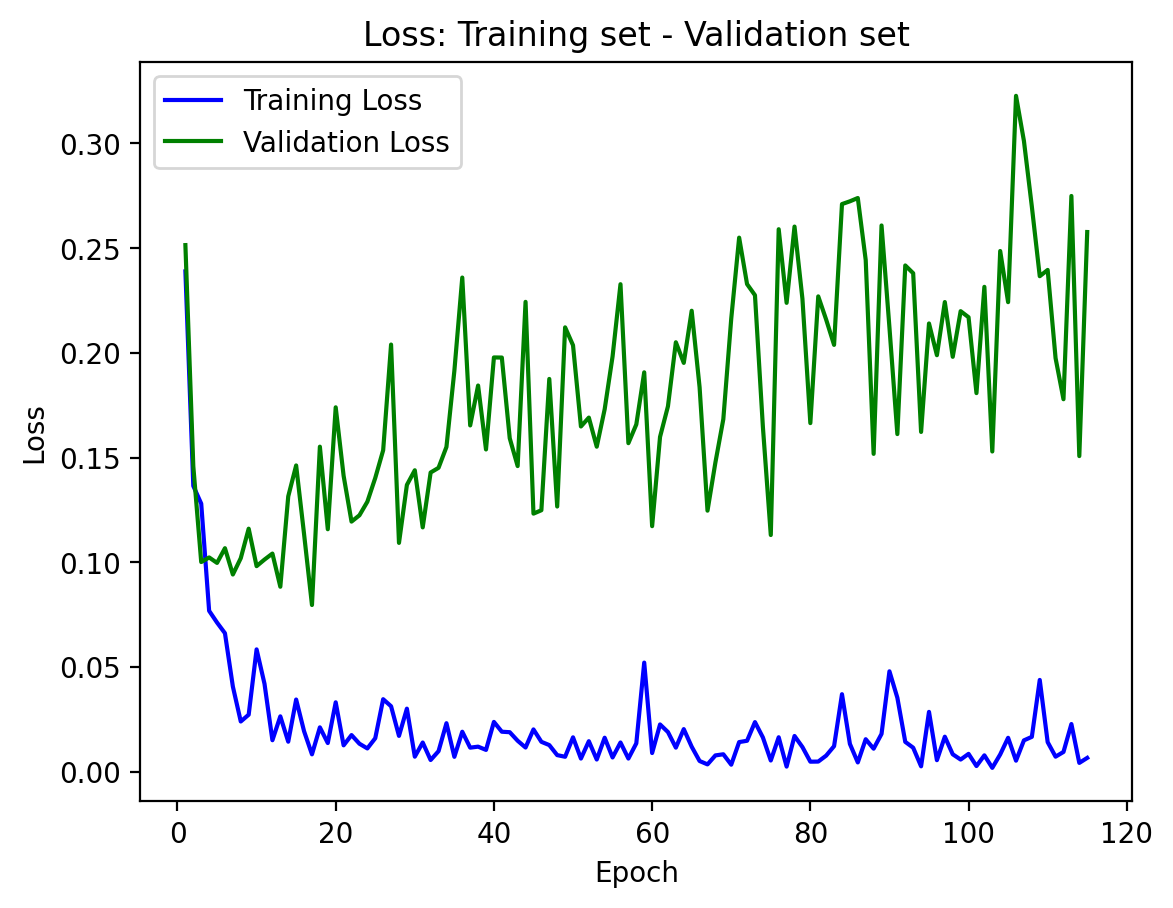

In [189]:
# Loss
plt.plot(epoch_list, loss_train_list, 'b', label = 'Training Loss')
plt.plot(epoch_list, loss_val_list, 'g', label = 'Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss: Training set - Validation set")
plt.savefig('lr001_2capa_RELU_loss_Adam')
plt.show()

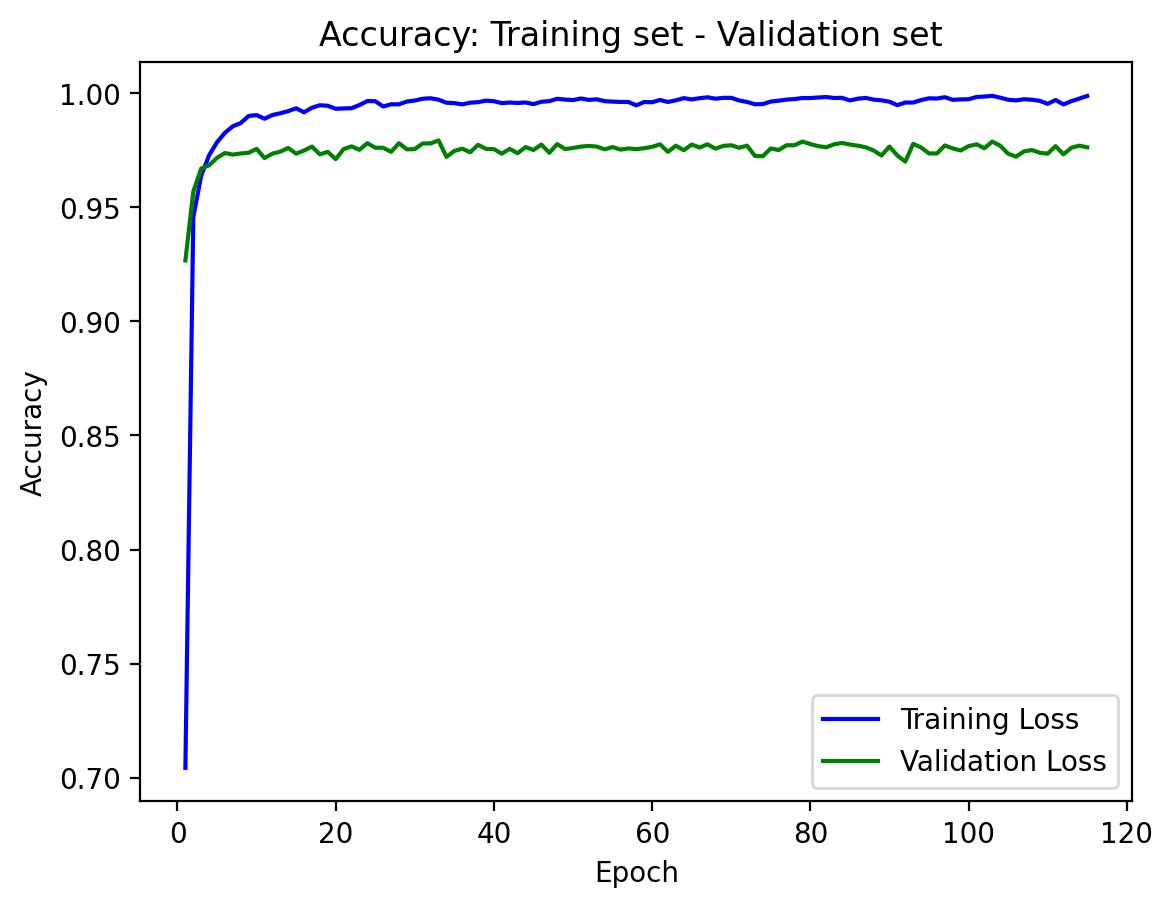

In [190]:
# Accuracy
plt.plot(epoch_list ,accuracy_train_list, 'b', label='Training Loss')
plt.plot(epoch_list ,accuracy_val_list, 'g', label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy: Training set - Validation set ")
plt.savefig('lr001_2capa_RELU_accuracy_Adam')
plt.show()